<a href="https://colab.research.google.com/github/jh941213/DeepLearing/blob/main/3_CNN_%EA%B8%B0%EB%B3%B8%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 CNN Basic Modeling

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

## 1. 데이터 로드 및 탐색

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


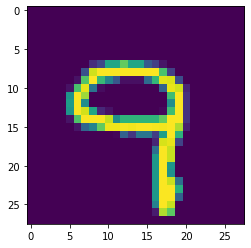

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[10004])
plt.show()

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
# conv layer에 넣어주기 위해서 28x28을 28x28x1 형태로 변경해야한다.
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

In [ ]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0 #편차가 적은게 학습에 도움이된다.오버핏에  도움이된다 꼭해야하는건 아님

### 2. 모델 구축
- Filtering 층과 Classification 층으로 구분
- Filtering 층 : Dense 대신 Conv2D, MaxPooling2D 사용
    - Conv2D : 
        - filter개수
        - filter_size
        - stride : default = 1
    - MaxPooling2D : 
        - filter_size
        - stride : default = filter_size

- model.summary()
    - 모델 구조, weight 개수 세기 정답지
    - Output Shape : 피처맵 
    - param # : weight 개수

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer 
#
모델갯수 필터사이즈
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [ ]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 학습 

model.fit(train_images, train_labels, epochs=3,validation_split=0.2,verbose=1) #batch =32 60000/1500 32


Epoch 1/3
1500/1500 [==============================] - 19s 4ms/step - loss: 0.1446 - accuracy: 0.9549 - val_loss: 0.0454 - val_accuracy: 0.9862
Epoch 2/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 3/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0429 - val_accuracy: 0.9877


In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0359 - accuracy: 0.9879 - 950ms/epoch - 3ms/step
0.9879000186920166


## cifar10 dataset 실습

170508288/170498071 [==============================] - 6s 0us/step


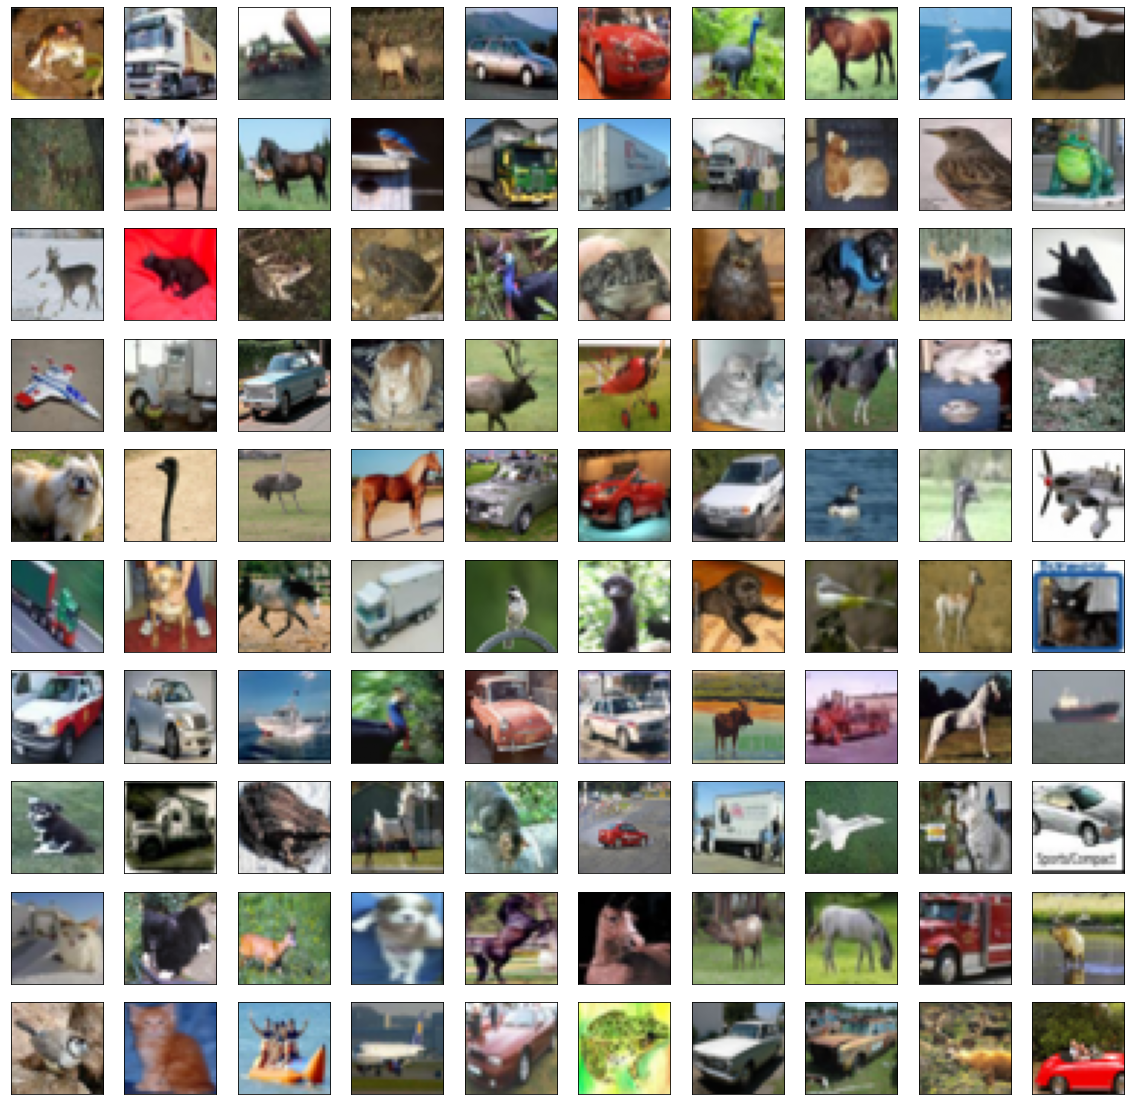

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32,32,3))
test_images = test_images.reshape((10000, 32,32,3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)#verbose = validaion 정확도출력
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4705 - accuracy: 0.4642
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0671 - accuracy: 0.6253
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8886 - accuracy: 0.6907
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7705 - accuracy: 0.7325
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6780 - accuracy: 0.7662
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5981 - accuracy: 0.7907
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5261 - accuracy: 0.8149
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4563 - accuracy: 0.8404
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4010 - accuracy: 0.8580
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.336

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 flatten_1 (Flatten)         (None, 4096)             